<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://www.redage.org/sites/default/files/styles/large/public/img-logo-institucion/logo_iteso.jpg?itok=IzloBJS1" style="width:500px;height:142px;" title="Logo ITESO"></center>

<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>Preprocessing</center></b></font>

<font face = "Times New Roman" size = "5"><b><center>Proyecto Final</center></b></font>
<div align="right"><font face = "Times New Roman" size = "2">nombres: Angel Aceves Manzo</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jorge Arturo Ponce Martin</font></div>
<div align="right"><font face = "Times New Roman" size = "2"> Jesus Vargas Pacheco</font></div>
</span></div>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
#############################################
#############################################

df = pd.read_csv("../../00_Data_Clean/ecommerce_customer_behavior_Clean.csv")

#############################################
#############################################

df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [59]:
df.head()

Order_ID Customer_ID        Date   Age  Gender      City  \
0  ord_003373  cust_03373  2024-02-29  52.0    male    ankara   
1  ord_004756  cust_04756  2023-03-06  38.0  female     bursa   
2  ord_003274  cust_03274  2023-01-08  43.0  female     adana   
3  ord_001874  cust_01874  2023-11-08  44.0    male     konya   
4  ord_000411  cust_00411  2024-03-11  43.0  female  istanbul   

  Product_Category  Unit_Price  Quantity  Discount_Amount  Total_Amount  \
0    home & garden      316.01       1.0             0.00        316.01   
1            books       20.37       2.0             4.56         36.18   
2      electronics      484.14       2.0             0.00        968.28   
3      electronics     4111.84       1.0           842.95       3268.89   
4             toys      111.68       NaN            32.03        303.01   

     Payment_Method Device_Type  Session_Duration_Minutes  Pages_Viewed  \
0       credit card      mobile                      23.0          11.0   
1        debit card     desktop                       8.0           8.0   
2        debit card      mobile                      14.0           4.0   
3  cash on delivery      mobile                      10.0          14.0   
4    digital wallet     desktop                      10.0          16.0   

   Is_Returning_Customer  Delivery_Time_Days  Customer_Rating  
0                   True                   3              1.0  
1                  False                   2              2.0  
2                  False                   3              NaN  
3                   True                   2              5.0  
4                   True                  11              5.0

In [60]:
#######################################################
#######################################################
y = df['Total_Amount']
X = df.drop(columns=['Total_Amount'])
#######################################################
#######################################################

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, shuffle=True
)

print("Shapes -> X_train:", X_train.shape, " | X_test:", X_test.shape)

Shapes -> X_train: (3750, 17)  | X_test: (1250, 17)


In [61]:
#################################################################
cols_num = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating']
cols_cat = ['Order_ID', 'Customer_ID', 'Date', 'Gender', 'City', 'Product_Category', 'Payment_Method', 'Device_Type', 'Is_Returning_Customer']
#################################################################
X_train_num = X_train[cols_num]
X_train_cat = X_train[cols_cat]
X_test_num = X_test[cols_num]
X_test_cat = X_test[cols_cat]

In [62]:
X_train_cat

Order_ID Customer_ID        Date  Gender       City Product_Category  \
4154  ord_000911  cust_00911  2023-08-29  female   istanbul           sports   
4820  ord_003232  cust_03232  2023-08-02  female      konya           sports   
1202  ord_000993  cust_00993  2023-08-04    male    kayseri           beauty   
3759  ord_002927  cust_02927  2023-04-08  female      izmir             food   
622   ord_000068  cust_00068  2023-05-31  female      izmir      electronics   
...          ...         ...         ...     ...        ...              ...   
4931  ord_004037  cust_04037  2023-10-31  female    antalya           beauty   
3264  ord_002240  cust_02240  2023-02-22    male  gaziantep      electronics   
1653  ord_001143  cust_01143  2024-03-22  female     ankara             toys   
2607  ord_001114  cust_01114  2023-10-29    male     ankara             toys   
2732  ord_000144  cust_00144  2023-05-16    male  gaziantep           beauty   

      Payment_Method Device_Type  Is_Returning_Customer  
4154     credit card      mobile                  False  
4820  digital wallet     desktop                  False  
1202     credit card      mobile                   True  
3759     credit card     desktop                   True  
622      credit card      tablet                   True  
...              ...         ...                    ...  
4931     credit card      mobile                  False  
3264      debit card     desktop                   True  
1653      debit card      mobile                  False  
2607     credit card      mobile                  False  
2732      debit card      mobile                   True  

[3750 rows x 9 columns]

In [63]:
########## codificado de columnas categoricas
####################################################################
cols_onehot  =  ['Gender', 'City', 'Product_Category', 'Payment_Method', 'Device_Type', 'Is_Returning_Customer'] #NOMINALES -> One Hot
cols_ordinal = [] #ORDINALES -> Ordinal

# Categorías ordenadas para las ordinales (mismo orden que en cols_ordinal)
categorias_ordinales = [[]] # lista de listas
####################################################################
preprocessor_cat = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(sparse_output=False, drop=None, handle_unknown="ignore"), cols_onehot),
        ("ordinal", OrdinalEncoder(categories=categorias_ordinales, handle_unknown="use_encoded_value", unknown_value=-1), cols_ordinal),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

preprocessor_cat.fit(X_train_cat)

X_train_cat_proc = preprocessor_cat.transform(X_train_cat)
X_test_cat_proc = preprocessor_cat.transform(X_test_cat)

# -----------------------------------------
# Renombrar One-Hot a formato col___categoria
# -----------------------------------------
onehot = preprocessor_cat.named_transformers_.get("onehot")

rename_map = {}
if onehot is not None and len(cols_onehot) > 0:
    for col, cats in zip(cols_onehot, onehot.categories_):
        for cat in cats:
            old = f"{col}_{cat}"      # nombre que entrega sklearn con verbose_feature_names_out=False
            new = f"{col}___{cat}"    # triple guion bajo deseado
            rename_map[old] = new

# Obtener nombres del ColumnTransformer y aplicar renombres solo a OHE
cols_out_cat = preprocessor_cat.get_feature_names_out()
cols_out_cat = [rename_map.get(c, c) for c in cols_out_cat]

# Reconstruir DataFrames con índices originales
df_train_cat_encode = pd.DataFrame(X_train_cat_proc, columns=cols_out_cat, index=X_train_cat.index)
df_test_cat_encode  = pd.DataFrame(X_test_cat_proc,  columns=cols_out_cat, index=X_test_cat.index)


In [64]:
df_test_cat_encode

Gender___female  Gender___male  Gender___other  City___adana  \
398               0.0            0.0             1.0           0.0   
3833              0.0            1.0             0.0           1.0   
4836              1.0            0.0             0.0           0.0   
4572              1.0            0.0             0.0           0.0   
636               0.0            1.0             0.0           0.0   
...               ...            ...             ...           ...   
465               1.0            0.0             0.0           0.0   
2670              1.0            0.0             0.0           0.0   
37                1.0            0.0             0.0           0.0   
3081              1.0            0.0             0.0           1.0   
2287              1.0            0.0             0.0           0.0   

      City___ankara  City___antalya  City___bursa  City___eskisehir  \
398             0.0             1.0           0.0               0.0   
3833            0.0             0.0           0.0               0.0   
4836            1.0             0.0           0.0               0.0   
4572            0.0             0.0           0.0               0.0   
636             0.0             1.0           0.0               0.0   
...             ...             ...           ...               ...   
465             0.0             0.0           0.0               1.0   
2670            1.0             0.0           0.0               0.0   
37              0.0             0.0           0.0               0.0   
3081            0.0             0.0           0.0               0.0   
2287            1.0             0.0           0.0               0.0   

      City___gaziantep  City___istanbul  ...  Payment_Method___bank transfer  \
398                0.0              0.0  ...                             1.0   
3833               0.0              0.0  ...                             0.0   
4836               0.0              0.0  ...                             1.0   
4572               0.0              1.0  ...                             0.0   
636                0.0              0.0  ...                             0.0   
...                ...              ...  ...                             ...   
465                0.0              0.0  ...                             0.0   
2670               0.0              0.0  ...                             0.0   
37                 0.0              1.0  ...                             0.0   
3081               0.0              0.0  ...                             0.0   
2287               0.0              0.0  ...                             0.0   

      Payment_Method___cash on delivery  Payment_Method___credit card  \
398                                 0.0                           0.0   
3833                                0.0                           1.0   
4836                                0.0                           0.0   
4572                                0.0                           0.0   
636                                 0.0                           0.0   
...                                 ...                           ...   
465                                 0.0                           0.0   
2670                                0.0                           1.0   
37                                  0.0                           1.0   
3081                                0.0                           1.0   
2287                                0.0                           0.0   

      Payment_Method___debit card  Payment_Method___digital wallet  \
398                           0.0                              0.0   
3833                          0.0                              0.0   
4836                          0.0                              0.0   
4572                          1.0                              0.0   
636                           0.0                              1.0   
...                           ...                     

In [65]:
###########################
########################### DIAGNÓSTICO DE COLUMNAS
###########################


# 1) Detecta numéricas
print("Columnas numéricas:", cols_num)

# 2) Funciones auxiliares
def iqr_outlier_stats(s: pd.Series):
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return 0, 0.0, np.nan, np.nan, np.nan, np.nan
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lim_inf, lim_sup = q1 - 1.5*iqr, q3 + 1.5*iqr
    n_out = int(((s < lim_inf) | (s > lim_sup)).sum())
    prop_out = n_out / len(s)
    return n_out, prop_out, q1, q3, lim_inf, lim_sup

def bounded_guess(s: pd.Series):
    """Detecta si parece estar acotada en [0,1] o [0,100]."""
    s = pd.to_numeric(s, errors="coerce").dropna()
    if s.empty:
        return None
    mn, mx = float(s.min()), float(s.max())
    if 0.0 <= mn and mx <= 1.0:
        return "[0,1]"
    if 0.0 <= mn and mx <= 100.0:
        return "[0,100]"
    return None

if len(cols_num) == 0:
    print("No hay columnas numéricas en X_train. No se generan imágenes.")
else:
    # --------- Figura 1: HISTOGRAMAS (todos en subplots) ----------
    n = len(cols_num)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()

    for i, col in enumerate(cols_num):
        s = pd.to_numeric(X_train[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=30)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Oculta subplots sobrantes
    for j in range(len(cols_num), len(axes)):
        axes[j].axis("off")

    fig.suptitle("Histogramas de columnas numéricas", y=1.02, fontsize=12)
    fig.tight_layout()
    fig.savefig("histogramas_numericas.png", dpi=150, bbox_inches="tight")
    plt.close(fig)

    # --------- Figura 2: BOXPLOTS (todas en un eje) ----------
    series_pairs = []
    for c in cols_num:
        v = pd.to_numeric(X_train[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos numéricos válidos para boxplots. No se genera boxplot.")
        box_path = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots de columnas numéricas")
        plt.tight_layout()
        fig2.savefig("boxplots_numericas.png", dpi=150, bbox_inches="tight")
        plt.close(fig2)


# ================================
# Diagnóstico numérico + heurística
# ================================
diagnostico = []
for c in cols_num:
    s = pd.to_numeric(X_train[c], errors="coerce")
    miss_pct = s.isna().mean() * 100
    s_no_na = s.dropna()
    skew = s_no_na.skew() if s_no_na.size > 1 else np.nan
    kurt = s_no_na.kurt() if s_no_na.size > 1 else np.nan
    n_out, prop_out, q1, q3, li, ls = iqr_outlier_stats(s)
    bounds = bounded_guess(s)

    # Heurística de imputación
    if (prop_out >= 0.05) or (pd.notna(skew) and abs(skew) >= 1.0):
        imputador = "median"
    else:
        imputador = "mean"

    # Heurística de escalado
    if prop_out >= 0.05:
        escalador = "RobustScaler"
    elif pd.notna(skew) and abs(skew) <= 0.5:
        escalador = "StandardScaler"
    else:
        escalador = "MinMaxScaler"  # por defecto en casos no normales o acotados

    diagnostico.append({
        "columna": c,
        "missing_%": round(miss_pct, 2),
        "skew": round(skew, 3) if pd.notna(skew) else np.nan,
        "kurtosis": round(kurt, 3) if pd.notna(kurt) else np.nan,
        "outliers_n": n_out,
        "outliers_%": round(prop_out*100, 2),
        "q1": q1, "q3": q3, "IQR": (q3 - q1),
        "lim_inf": li, "lim_sup": ls,
        "bounded": bounds,
        "recom_imputer": imputador,
        "recom_scaler": escalador,
    })

diag_df = pd.DataFrame(diagnostico).sort_values(["outliers_%","missing_%"], ascending=False)
print("\n=== Diagnóstico numérico (heurística) ===\n")

##########################################################
##########################################################

# print(diag_df)

##########################################################
##########################################################

# Sugerencias de bloques numéricos (incluye median+Robust)
suggest_mean_rob = diag_df.query("recom_imputer=='mean' and recom_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_rob  = diag_df.query("recom_imputer=='median' and recom_scaler=='RobustScaler'")["columna"].tolist()
suggest_med_min  = diag_df.query("recom_imputer=='median' and recom_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_med_std  = diag_df.query("recom_imputer=='median' and recom_scaler=='StandardScaler'")["columna"].tolist()
suggest_mean_min = diag_df.query("recom_imputer=='mean' and recom_scaler=='MinMaxScaler'")["columna"].tolist()
suggest_mean_std = diag_df.query("recom_imputer=='mean' and recom_scaler=='StandardScaler'")["columna"].tolist()

print("\nSugerencias de bloques numéricos (auto):")
print("median+Robust   :", suggest_med_rob)
print("median+MinMax   :", suggest_med_min)
print("median+Standard :", suggest_med_std)
print("mean+Robust     :", suggest_mean_rob)
print("mean+MinMax     :", suggest_mean_min)
print("mean+Standard   :", suggest_mean_std)

Columnas numéricas: ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating']

=== Diagnóstico numérico (heurística) ===


Sugerencias de bloques numéricos (auto):
median+Robust   : ['Discount_Amount', 'Unit_Price']
median+MinMax   : ['Delivery_Time_Days', 'Session_Duration_Minutes', 'Quantity']
median+Standard : []
mean+Robust     : []
mean+MinMax     : ['Customer_Rating']
mean+Standard   : ['Age', 'Pages_Viewed']


In [66]:
# --- Listas de columnas ---
# Nota este paso depende de EXPERIENCIA
# Numéricas
# num_med_rob_cols: inputacion mediana con escalado robusto
# num_med_min_cols: inputación mediana con escalado min_max
# num_med_std_cols: inputacion mediana con escalado Estandar
# num_mean_rob_cols: inputación media con escalado robusto
# num_mean_min_cols: inputacion media con escalado min_max
# num_mean_std_cols: inputacion media con escalado Estandar

#########################################################
#########################################################

num_med_rob_cols = ['Discount_Amount', 'Unit_Price']
num_med_min_cols = ['Delivery_Time_Days', 'Session_Duration_Minutes', 'Quantity']
#num_med_std_cols = []   # mediana + Estandar
#num_mean_rob_cols = []   # media + Robust
#num_mean_min_cols  = []  # media + MinMax
num_mean_std_cols  = ['Age', 'Pages_Viewed', 'Customer_Rating']

#########################################################
#########################################################

#passthrough_cols =                       # pasar sin procesar
#drop_cols        = []                      # eliminar

#########################################################
#########################################################


In [67]:
# --- Pipelines NUMÉRICOS ---
pipe_med_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  RobustScaler())
])

pipe_med_min = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler",  MinMaxScaler())
])

'''pipe_med_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])'''


'''pipe_mean_rob = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  RobustScaler())
])'''

'''pipe_mean_min = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  MinMaxScaler())
])'''

pipe_mean_std = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler",  StandardScaler())
])

In [68]:
# --- ColumnTransformer unificado ---
preprocessor_num = ColumnTransformer(
    transformers=[
        ("num_med_rob", pipe_med_rob, num_med_rob_cols),
        ("num_med_min", pipe_med_min, num_med_min_cols),
        #("num_med_std", pipe_med_std, num_med_std_cols),
        #("num_mean_rob",  pipe_mean_rob,  num_mean_rob_cols),
        #("num_mean_min",  pipe_mean_min,  num_mean_min_cols),
        ("num_mean_std",  pipe_mean_std,  num_mean_std_cols),

        # Passthrough (sin preprocesar)
        #("passthrough",  "passthrough", passthrough_cols),

        #Drop explícito
        #("drop_high_na", "drop", drop_cols),
    ],
    remainder="drop",                        # descarta cualquier otra columna no listada
    verbose_feature_names_out=False
)


In [69]:
# ==========================================
# NUEVO PIPELINE = PREPROCESOR_NUM + STD_FOR_PCA + PCA
# ==========================================

from sklearn.decomposition import PCA

# Pipeline para estimar TODO el espectro (sin producir T todavía)
pca_pipe_full = Pipeline(steps=[
    ("pre", preprocessor_num),           # tu preprocesador tal cual
    ("std_for_pca", StandardScaler()),   # re-estandarización para correlaciones
    ("pca", PCA(n_components=None, svd_solver="full", random_state=0)),
])

# FIT solo con train (no hacemos transform)
pca_pipe_full.fit(X_train_num)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num_med_rob',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Discount_Amount',
                                                   'Unit_Price']),
                                                 ('num_med_min',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Delivery_Time_Days',
                                                   'Session_Duration_Minutes',
                                                   'Quantity']),
                                                 ('num_mean_std',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Pages_Viewed',
                                                   'Customer_Rating'])],
                                   verbose_feature_names_out=False)),
                ('std_for_pca', StandardScaler()),
                ('pca', PCA(random_state=0, svd_solver='full'))])

In [70]:
# Espectro
pca_full = pca_pipe_full.named_steps["pca"]
expl = pca_full.explained_variance_ratio_
cum  = np.cumsum(expl)
ks   = np.arange(1, len(expl)+1)

# Sugerencias de k
k90 = int(np.searchsorted(cum, 0.90) + 1)
k95 = int(np.searchsorted(cum, 0.95) + 1)
# “Codo” simple por segunda diferencia
d2 = np.diff(np.diff(expl))
k_elbow = int(np.argmax(-d2) + 2) if len(d2) else 1

print("Varianza explicada (primeros 10):", np.round(expl[:10], 6))
print("Acumulada (primeros 10):         ", np.round(cum[:10], 6))
print(f"Sugerencias -> k@90%={k90}, k@95%={k95}, k(elbow)={k_elbow}")

Varianza explicada (primeros 10): [0.177094 0.129975 0.127923 0.126478 0.12437  0.121775 0.119084 0.073301]
Acumulada (primeros 10):          [0.177094 0.307069 0.434992 0.56147  0.68584  0.807615 0.926699 1.      ]
Sugerencias -> k@90%=7, k@95%=8, k(elbow)=7


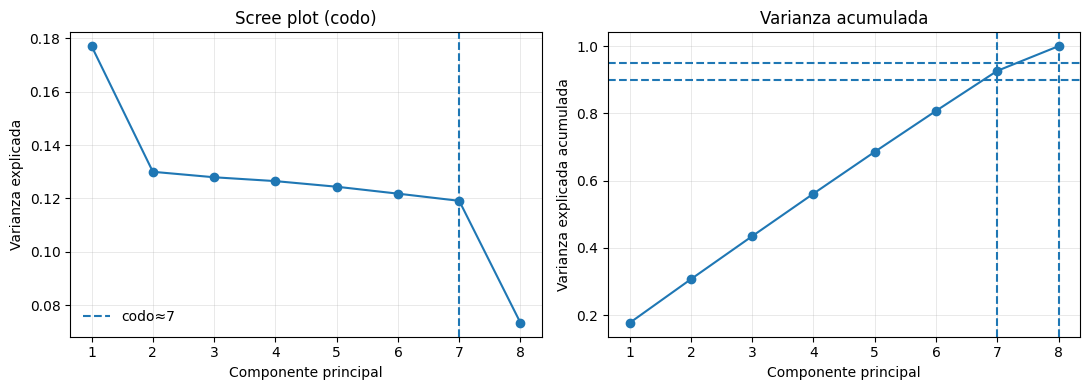

In [71]:
# --------- Gráficos ----------
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# (a) Scree / codo
axs[0].plot(ks, expl, marker="o")
axs[0].set_xlabel("Componente principal")
axs[0].set_ylabel("Varianza explicada")
axs[0].set_title("Scree plot (codo)")
axs[0].grid(True, linewidth=0.4, alpha=0.5)
axs[0].axvline(k_elbow, linestyle="--", label=f"codo≈{k_elbow}")
axs[0].legend(frameon=False)

# (b) Acumulada con líneas de referencia
axs[1].plot(ks, cum, marker="o")
axs[1].set_xlabel("Componente principal")
axs[1].set_ylabel("Varianza explicada acumulada")
axs[1].set_title("Varianza acumulada")
axs[1].grid(True, linewidth=0.4, alpha=0.5)
axs[1].axhline(0.90, linestyle="--"); axs[1].axvline(k90, linestyle="--")
axs[1].axhline(0.95, linestyle="--"); axs[1].axvline(k95, linestyle="--")

plt.tight_layout(); plt.show()

In [72]:
# Elige el número de componentes (puedes usar 0.95 para varianza acumulada)

###############################################
k = 8
###############################################

pca_pipe = Pipeline(steps=[
    ("pre", preprocessor_num),         # tu preprocesador tal cual
    ("std_for_pca", StandardScaler()), # re-estandarización para usar correlaciones
    ("pca", PCA(n_components=k, svd_solver="full", random_state=0)),

])

# --- FIT en train ---
pca_pipe.fit(X_train_num)

# --- TRANSFORM en train y test ---
T_train = pca_pipe.transform(X_train_num)
T_test  = pca_pipe.transform(X_test_num)

# DataFrames de scores
pc_cols = [f"PC{i+1}" for i in range(T_train.shape[1])]
T_train_df = pd.DataFrame(T_train, columns=pc_cols, index=X_train_num.index)
T_test_df  = pd.DataFrame(T_test,  columns=pc_cols, index=X_test_num.index)

# Varianza explicada
pca_step = pca_pipe.named_steps["pca"]
expl = pca_step.explained_variance_ratio_
print("Varianza explicada:", np.round(expl, 6))
print("Acumulada:", np.round(np.cumsum(expl), 6))

# Guardar outputs (opcional)
T_train_df.to_csv("T_train_PCA.csv", index=False)
T_test_df.to_csv("T_test_PCA.csv", index=False)

print("Shapes -> T_train:", T_train_df.shape, "| T_test:", T_test_df.shape)
display(T_train_df.head())

Varianza explicada: [0.177094 0.129975 0.127923 0.126478 0.12437  0.121775 0.119084 0.073301]
Acumulada: [0.177094 0.307069 0.434992 0.56147  0.68584  0.807615 0.926699 1.      ]
Shapes -> T_train: (3750, 8) | T_test: (1250, 8)


PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
4154  0.471948 -0.579149  1.521629 -0.186432 -0.062978 -0.693230  0.025374   
4820  2.509848  1.348587  3.889877 -1.284385  0.596133  2.553178 -1.509168   
1202 -0.197581 -0.279411  1.457258 -0.376840  0.553272 -0.451123  0.479281   
3759 -0.523115 -0.736739 -0.567720  0.364835  0.230557 -1.179599 -0.685428   
622   7.544555 -0.080174 -0.035884  0.019877 -0.401771  2.308790 -0.358973   

           PC8  
4154  0.435773  
4820  1.348134  
1202  0.287224  
3759  0.196545  
622   1.977104

In [73]:
# Solo si k >= 2
import plotly.express as px

df_plot2 = T_train_df.iloc[:, :2].copy()
df_plot2["objetivo"] = y_train.loc[T_train_df.index].astype(str)
fig2 = px.scatter(df_plot2, x="PC1", y="PC2", color="objetivo",
                  opacity=0.85, title="PC1 vs PC2 por 'objetivo' (train)", height=550)
fig2.update_traces(marker=dict(size=6))
fig2.update_layout(xaxis_title="PC1", yaxis_title="PC2")
fig2.show()

In [74]:
#### Solo si k>=3
df_plot = T_train_df.iloc[:, :3].copy()          # PC1, PC2, PC3
# Alinea objetivo con los índices de T_train_df
df_plot["objetivo"] = y_train.loc[T_train_df.index].astype(str)

fig = px.scatter_3d(
    df_plot,
    x="PC1", y="PC2", z="PC3",
    color="objetivo",
    opacity=0.85,
    title="PC1–PC2–PC3 por ‘objetivo’ (train)",
    height=600
)
fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(xaxis_title="PC1", yaxis_title="PC2", zaxis_title="PC3"))
fig.show()

In [75]:
# === Concatenar PCs (numéricas) con categóricas codificadas ===
# Asegura alineación por índice
df_train_cat_encode = df_train_cat_encode.reindex(T_train_df.index)
df_test_cat_encode  = df_test_cat_encode.reindex(T_test_df.index)

T_train_final = pd.concat([T_train_df, df_train_cat_encode], axis=1)
T_test_final  = pd.concat([T_test_df,  df_test_cat_encode], axis=1)

# Añadir columna objetivo (alineada por índice)
T_train_final_out = T_train_final.copy()
T_test_final_out  = T_test_final.copy()

T_train_final_out["objetivo"] = y_train.loc[T_train_final.index].astype(str)
T_test_final_out["objetivo"]  = y_test.loc[T_test_final.index].astype(str)


print("T_train_final:", T_train_final.shape)
print("T_test_final :", T_test_final.shape)

T_train_final.to_csv("T_train_final.csv", index=False)
T_test_final.to_csv("T_test_final.csv", index=False)
T_train_final_out.to_csv("T_train_final_objetivo.csv", index=False)
T_test_final_out.to_csv("T_test_final_objetivo.csv", index=False)
# X_train_final.head()


T_train_final: (3750, 39)
T_test_final : (1250, 39)


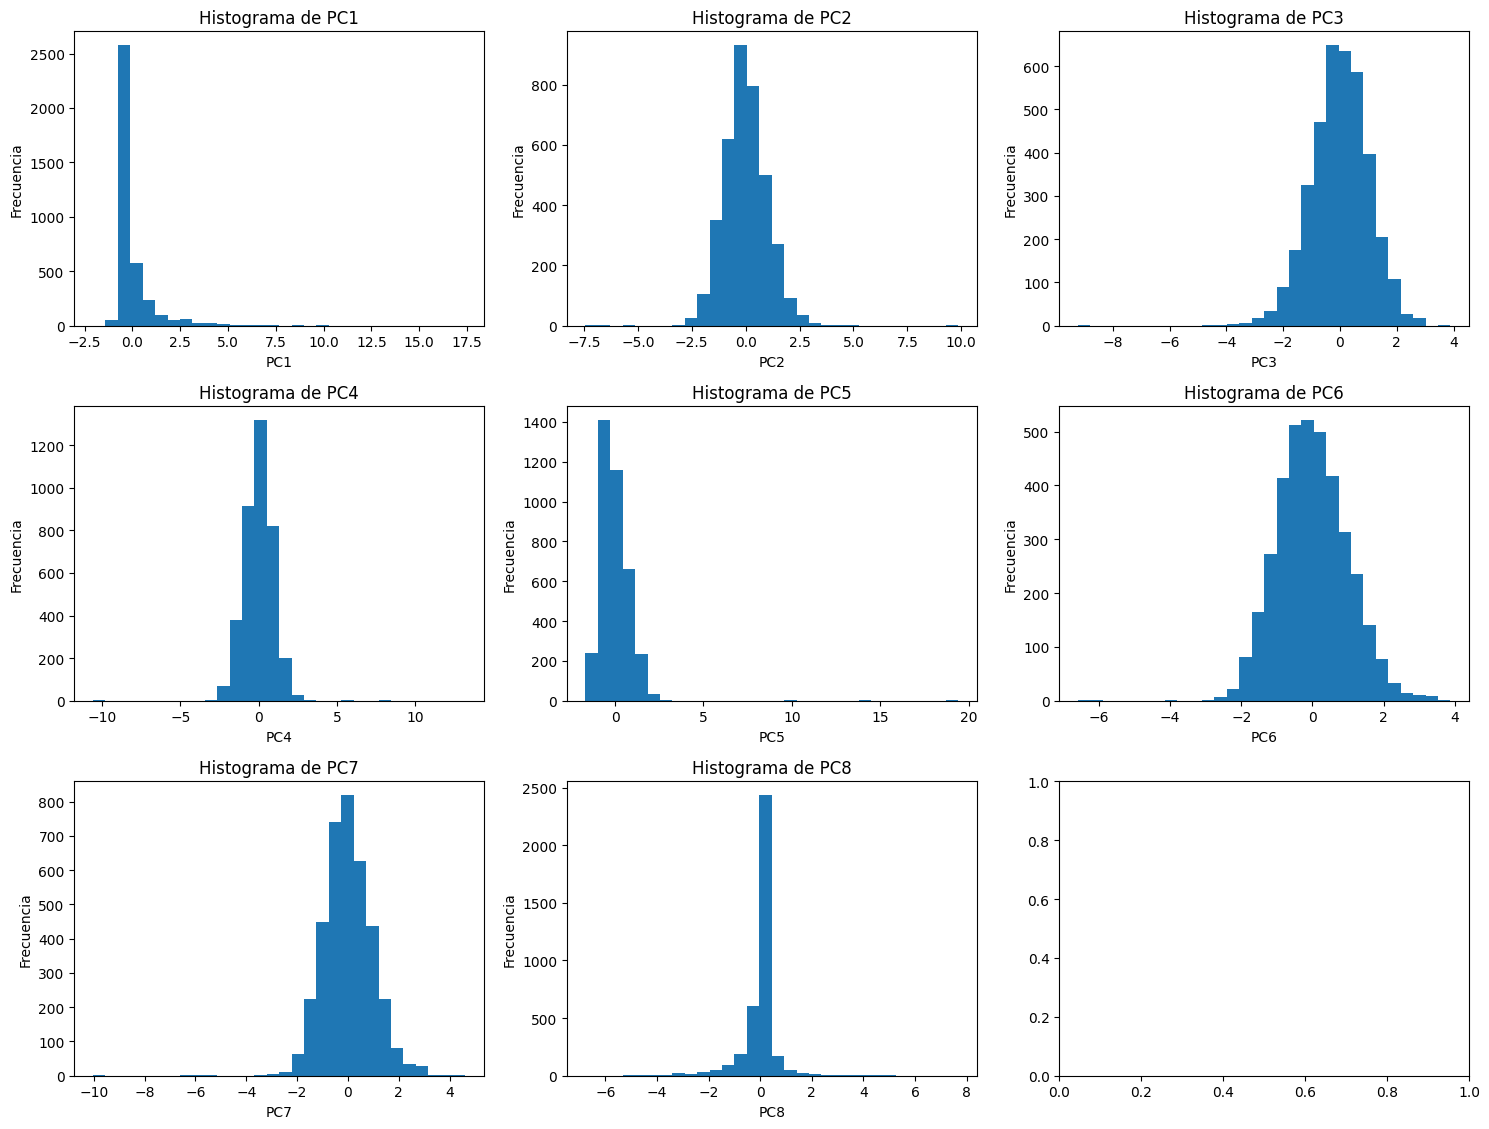

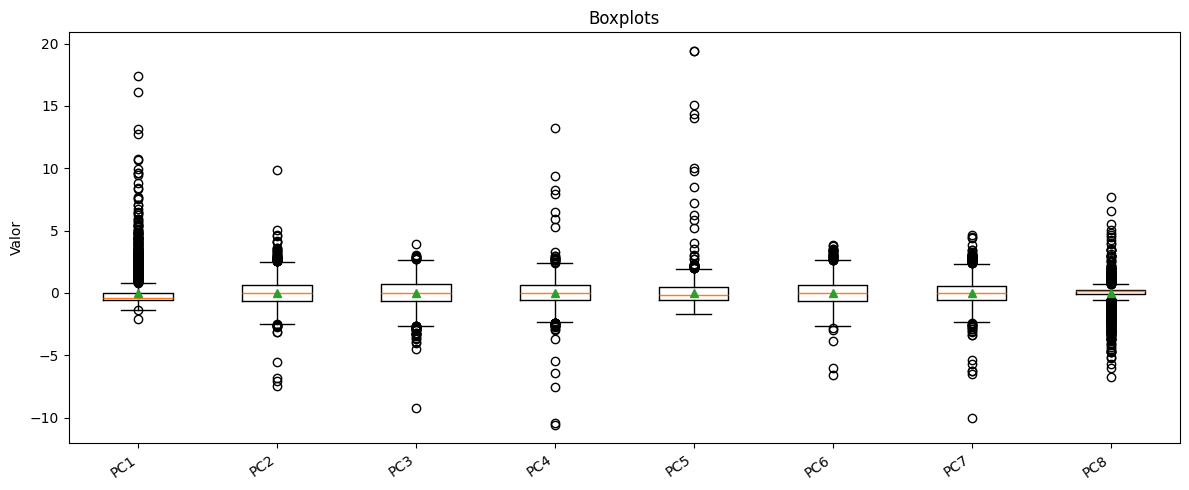

In [76]:
# Histogramas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
axes = axes.ravel()

for i, col in enumerate(T_train_df.columns):
    axes[i].hist(T_train_df[col], bins=30)
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(12,5))
plt.boxplot([T_train_df[c] for c in T_train_df.columns], labels=T_train_df.columns,vert=True, showmeans=True)

plt.title("Boxplots")
plt.xticks(rotation=35, ha="right")
plt.ylabel("Valor")
plt.tight_layout()
plt.show()


In [77]:
T_train_final_out

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
4154  0.471948 -0.579149  1.521629 -0.186432 -0.062978 -0.693230  0.025374   
4820  2.509848  1.348587  3.889877 -1.284385  0.596133  2.553178 -1.509168   
1202 -0.197581 -0.279411  1.457258 -0.376840  0.553272 -0.451123  0.479281   
3759 -0.523115 -0.736739 -0.567720  0.364835  0.230557 -1.179599 -0.685428   
622   7.544555 -0.080174 -0.035884  0.019877 -0.401771  2.308790 -0.358973   
...        ...       ...       ...       ...       ...       ...       ...   
4931 -0.601659  0.117408 -0.274338  0.434337 -0.450983  0.401936  0.455584   
3264  6.439196 -0.035518  0.864560 -0.043236  0.143468  0.589822  1.053328   
1653 -0.450526  0.054279 -0.910250 -0.888399 -0.802484  0.839281 -0.671015   
2607 -0.389366 -0.794953 -0.137395  0.171760  0.820119 -0.216798 -0.014609   
2732 -0.228763 -0.882523 -0.795382  0.006074  0.421853 -1.172396  0.119390   

           PC8  Gender___female  Gender___male  ...  \
4154  0.435773              1.0            0.0  ...   
4820  1.348134              1.0            0.0  ...   
1202  0.287224              0.0            1.0  ...   
3759  0.196545              1.0            0.0  ...   
622   1.977104              1.0            0.0  ...   
...        ...              ...            ...  ...   
4931  0.223757              1.0            0.0  ...   
3264  2.971535              0.0            1.0  ...   
1653  0.189525              1.0            0.0  ...   
2607  0.257495              0.0            1.0  ...   
2732  0.321649              0.0            1.0  ...   

      Payment_Method___cash on delivery  Payment_Method___credit card  \
4154                                0.0                           1.0   
4820                                0.0                           0.0   
1202                                0.0                           1.0   
3759                                0.0                           1.0   
622                                 0.0                           1.0   
...                                 ...                           ...   
4931                                0.0                           1.0   
3264                                0.0                           0.0   
1653                                0.0                           0.0   
2607                                0.0                           1.0   
2732                                0.0                           0.0   

      Payment_Method___debit card  Payment_Method___digital wallet  \
4154                          0.0                              0.0   
4820                          0.0                              1.0   
1202                          0.0                              0.0   
3759                          0.0                              0.0   
622                           0.0                              0.0   
...                           ...                              ...   
4931                          0.0                              0.0   
3264                          1.0                              0.0   
1653                          1.0                              0.0   
2607                          0.0                              0.0   
2732                          1.0                              0.0   

      Device_Type___desktop  Device_Type___mobile  Device_Type___tablet  \
4154                    0.0                   1.0                   0.0   
4820                    1.0                   0.0                   0.0   
1202                    0.0                   1.0                   0.0   
3759                    1.0                   0.0                   0.0   
622                     0.0                   0.0                   1.0   
...                     ...                   ...                   ...   
4931                    0.0                   1.0                   0.0   
3264                    1.0                   0.0                   0.0   
1653                

In [78]:
# === Guardar artefactos ===
import joblib
import json

# 1) Pipelines ya FIT: preprocessor_cat y pca_pipe
joblib.dump(preprocessor_cat, "preprocessor_cat.joblib")
joblib.dump(pca_pipe, "pca_pipe_num.joblib")   # (preprocessor_num + StdScaler + PCA)

# 2) Metadatos útiles para producción
meta = {
    "cols_num": cols_num,            # columnas numéricas originales
    "cols_cat": cols_cat,            # columnas categóricas originales
    "pc_cols": list(T_train_df.columns),            # nombres de PCs (PC1, PC2, …)
    "cat_out_cols": list(df_train_cat_encode.columns)  # columnas codificadas finales (OHE + Ordinal)
}
with open("pca_metadata.json", "w") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)


In [79]:
import os, zipfile, glob
# Guardamos los calculos y el proceso de los calculos
# Carpeta destino en tu PC
dst_dir = r"mi_pca"
os.makedirs(dst_dir, exist_ok=True)
zip_path = os.path.join(dst_dir, "pca_artifacts_bundle.zip")

# Archivos que quieres incluir (ajusta si te falta alguno)
candidates = [
    "T_test_PCA.csv",
    "T_test_final.csv",
    "T_test_final_objetivo.csv",
    "T_train_PCA.csv",
    "T_train_final.csv",
    "T_train_final_objetivo.csv",
    "boxplots_numericas.png",
    "histogramas_numericas.png",
    "pca_metadata.json",
    "pca_pipe_num.joblib",
    "preprocessor_cat.joblib",
]

present = [f for f in candidates if os.path.exists(f)]
# Si quieres incluir una carpeta (p. ej., 'sample_data'), descomenta:
# for root, _, files in os.walk("sample_data"):
#     for f in files:
#         present.append(os.path.join(root, f))

with zipfile.ZipFile(zip_path, "w", compression=zipfile.ZIP_DEFLATED) as zf:
    for f in present:
        zf.write(f, arcname=os.path.basename(f))  # guarda sin subcarpetas

print("ZIP creado en:", zip_path)
print("Incluidos:", present)


ZIP creado en: mi_pca\pca_artifacts_bundle.zip
Incluidos: ['T_test_PCA.csv', 'T_test_final.csv', 'T_test_final_objetivo.csv', 'T_train_PCA.csv', 'T_train_final.csv', 'T_train_final_objetivo.csv', 'boxplots_numericas.png', 'histogramas_numericas.png', 'pca_metadata.json', 'pca_pipe_num.joblib', 'preprocessor_cat.joblib']
